Lab 2
===

Frequency Domain Identification Techniques
----------------------------------------------------


In [20]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
from vibration_toolbox import sdof_cf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math
import scipy.linalg as la

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Plotting Experimental Data
------------------------------

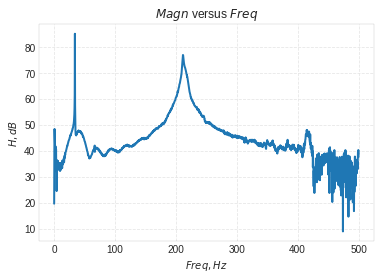

In [21]:
# Mag vs Freq

%matplotlib inline
mat_contents=sio.loadmat('Case2-2.mat')
c = mat_contents['Freq_domain']
d = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(d)))
plt.plot(c,H)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$H,dB$')
plt.title('$Magn$ versus $Freq$')
plt.show()

Using Vibration Toolbox
-------------------------------

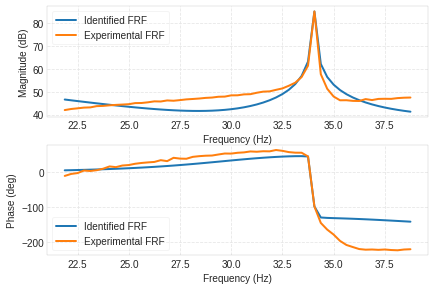

(0.00038369496272758913, 34.042986534079276, 16.813265077508397)

In [22]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case2-2.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=70
    Fmax=125
    sdof_cf(f, TF, Fmin, Fmax)
   

Beam Parameters
--------------------

In [25]:
E=7.31e10 #young's Modulus
b1=0.0254 #width
h=0.0127 #height
l=0.5524 #length
r=2.7*(10**3) #Density
A=b1*h #Cross-sectional area
v=l*b1*h #volume
m=r*v #mass
I=(1/12)*b1*(h**3) #Area moment of inertia

Close form Euler-Bernoulli solution
-------------------------------------------

In [26]:
betal= 1.87510407
beta1=betal/l 
wnA1=((beta1)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)


In [27]:
betal= 4.69409113
beta2=betal/l 
wnA2=((beta2)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)


Transverse Displacement at beam center using VTB
---------------------------------------------------------

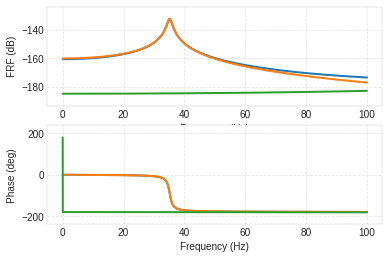

In [28]:
vtb.euler_beam_frf(xin=l, xout=l/2, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1601,
                   beamparams=np.array([E, I,
r, A, l]))
admittanceCen = np.abs(H[1600])
excitationforce=100
displacementCen = admittanceCen*excitationforce


Transverse Displacement at beam tip using VTB
---------------------------------------------------------

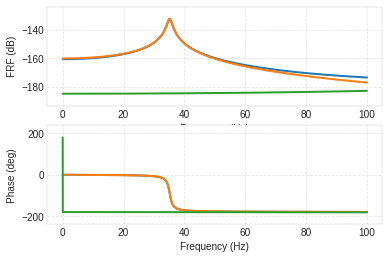

In [29]:
vtb.euler_beam_frf(xin=l/2, xout=l, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1600,
                   beamparams=np.array([E, I,
r, A, l]))

admittanceEnd = np.abs(H[1600])
excitationforce=100
displacementEnd = admittanceEnd*excitationforce

